# Continued Analysis


In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd

from typing import Optional
from enrich.style import STYLES
from rich.theme import Theme
from rich.console import Console

from ClimRR import (
    set_plot_style,
    get_logger,
    DEFAULT_CRS,
)
from ClimRR.data import (
    load_shapefile,
    load_csvs,
    load_counties,
    load_chicago_data
)

set_plot_style()
theme = Theme(STYLES)
log = get_logger('ClimRR')
console = Console(theme=theme, log_path=False, markup=True)

Using updated plot style for matplotlib

In [2]:
shape = load_shapefile()
data = load_csvs(shape)
chidata = load_chicago_data(shape.crs)

data['FireWeatherIndex_Wildfire'].shape=(62834, 35)

data['HeatingDegreeDays'].shape=(62834, 10)

data['AnnualTemperatureMinimum'].shape=(62834, 18)

data['SeasonalTemperatureMaximum'].shape=(62834, 27)

data['ConsecutiveDayswithNoPrecipitation'].shape=(55896, 19)

data['SeasonalTemperatureMinimum'].shape=(62834, 27)

data['WindSpeed'].shape=(62834, 18)

data['AnnualTemperatureMaximum'].shape=(62834, 18)

data['Precipitation_inches_AnnualTotal'].shape=(55896, 18)

In [3]:
counties = load_counties(shape.crs)

In [4]:
illinois = counties[counties["ste_name"] == "['Illinois']"]
wind_il = data["WindSpeed"].overlay(illinois, how='intersection')

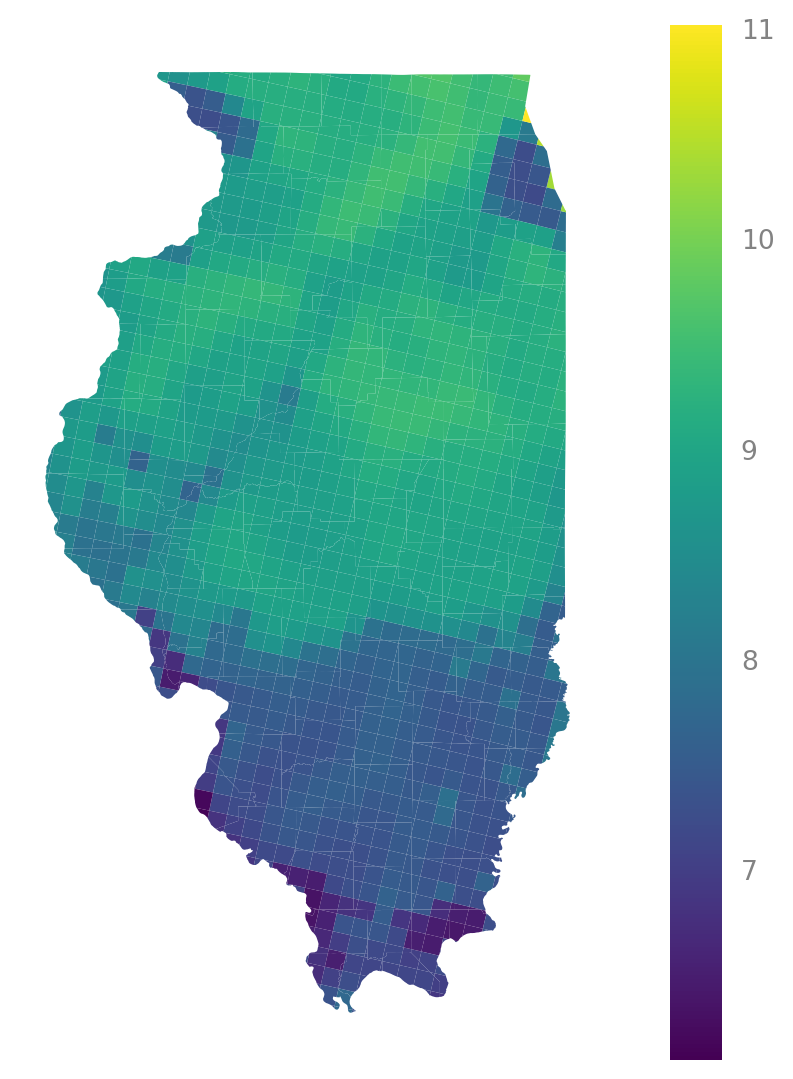

In [5]:
fig, ax = plt.subplots(figsize=(10, 7))
wind_il.plot(ax=ax, column='hist', legend=True)
ax.set_axis_off()
plt.show()

In [6]:
console.log("\n".join(list(data.keys())))

[07:54:38] FireWeatherIndex_Wildfire                                                         
           HeatingDegreeDays                                                                 
           AnnualTemperatureMinimum                                                          
           SeasonalTemperatureMaximum                                                        
           ConsecutiveDayswithNoPrecipitation                                                
           SeasonalTemperatureMinimum                                                        
           WindSpeed                                                                         
           AnnualTemperatureMaximum                                                          
           Precipitation_inches_AnnualTotal

In [7]:
def get_state(
        state: str,
        counties: Optional[gpd.GeoDataFrame] = None,
) -> gpd.GeoDataFrame:
    counties = load_counties(DEFAULT_CRS) if counties is None else counties
    assert counties is not None and isinstance(counties, gpd.GeoDataFrame)
    assert counties.crs == DEFAULT_CRS
    return counties[counties["ste_name"] == f"['{state}']"]


def get_variable_for_state(
        data: gpd.GeoDataFrame,
        state: gpd.GeoDataFrame,
) -> gpd.GeoDataFrame:
    """Returns `data.overlay(state, how='intersection')`"""
    return data.overlay(state, how='intersection')

In [8]:
california = get_state('California', counties=counties)

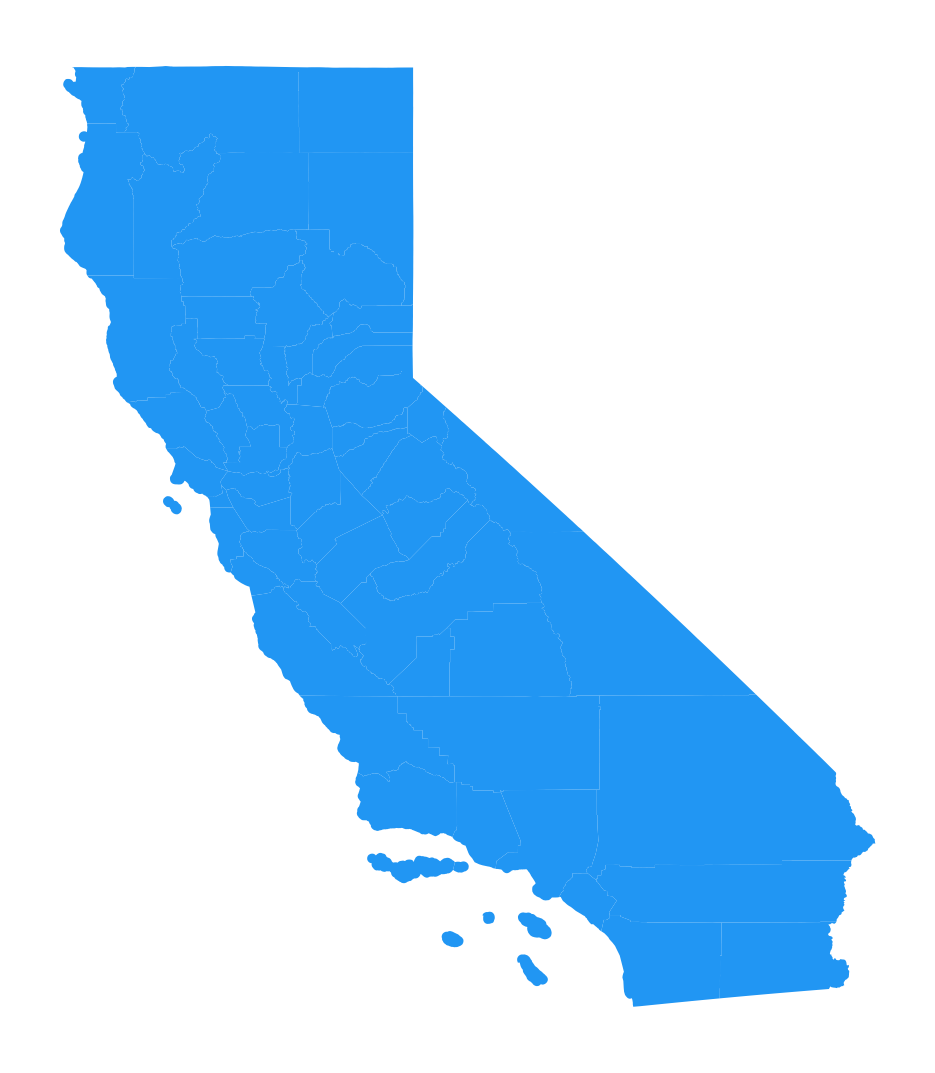

In [9]:
fig, ax = plt.subplots(figsize=(10, 7))
ax = california.plot(ax=ax)
ax.set_axis_off()

In [10]:
cali_temp_max = get_variable_for_state(
    data["SeasonalTemperatureMaximum"],
    california
)

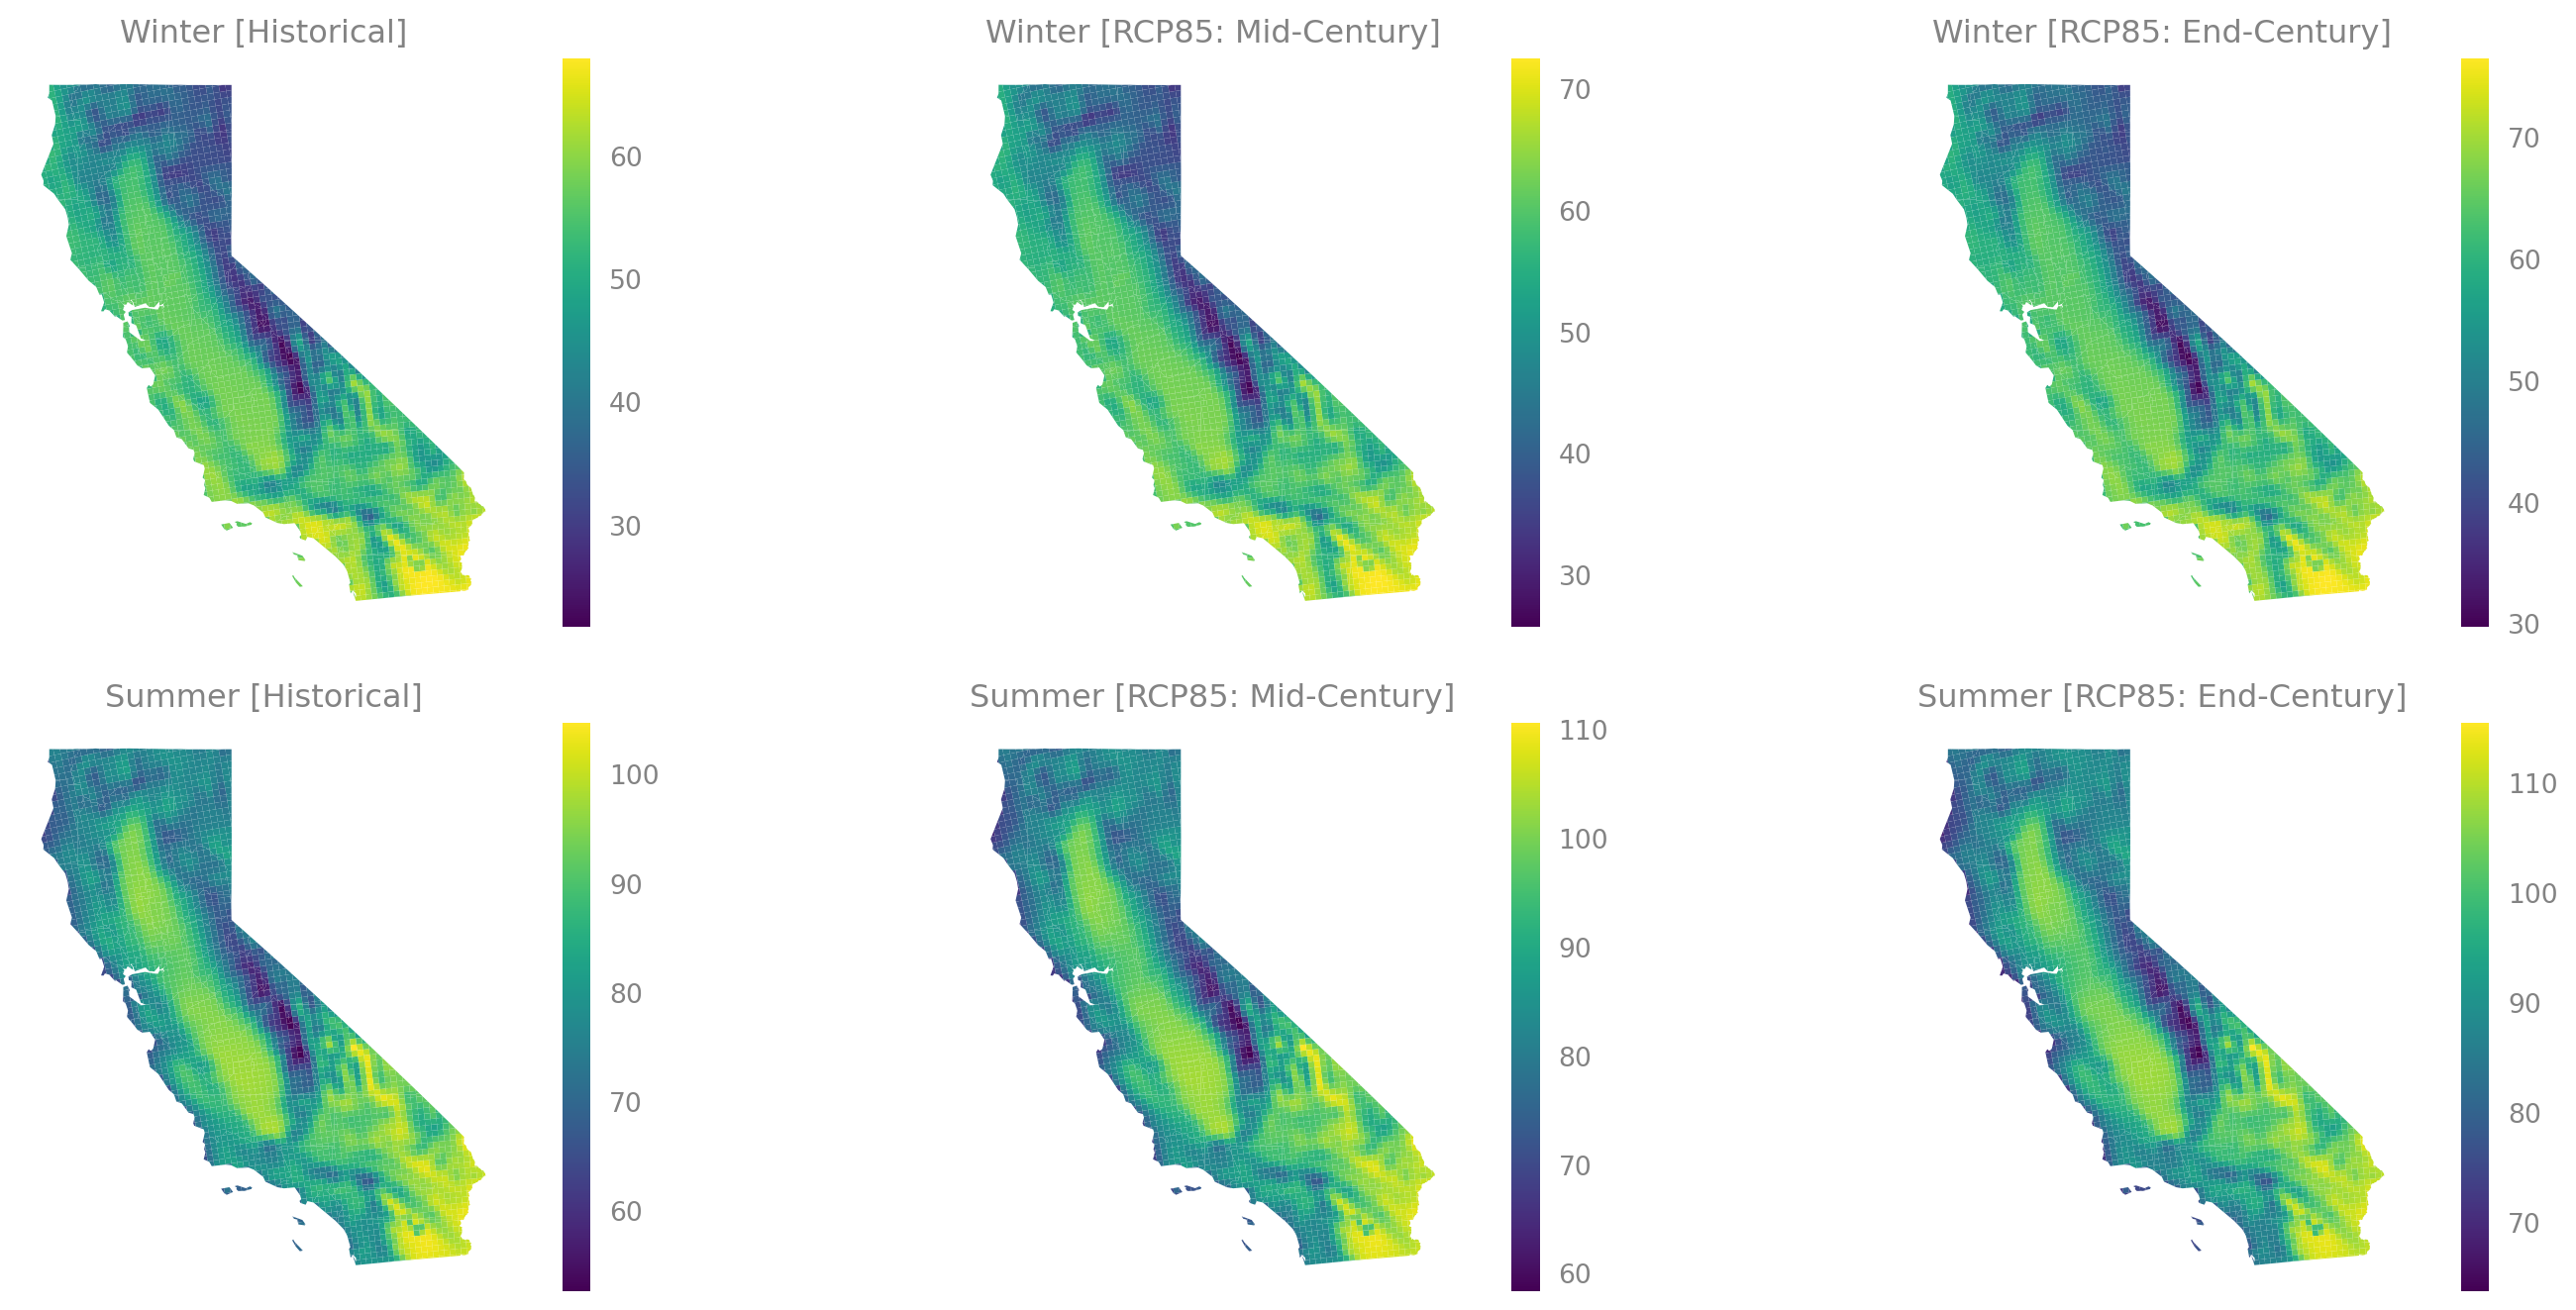

In [11]:
fig, ax = plt.subplots(figsize=(16, 7), nrows=2, ncols=3, sharey='row', sharex='col')
ax = ax.flatten()
ax0 = cali_temp_max.plot(ax=ax[0], column='hist_winter', legend=True)
ax0.set_title('Winter [Historical]')
ax0.set_axis_off()
ax1 = cali_temp_max.plot(ax=ax[1], column='rcp85_midc_winter', legend=True)
ax1.set_axis_off()
ax1.set_title('Winter [RCP85: Mid-Century]')
ax2 = cali_temp_max.plot(ax=ax[2], column='rcp85_endc_winter', legend=True)
ax2.set_axis_off()
ax2.set_title('Winter [RCP85: End-Century]')

ax3 = cali_temp_max.plot(ax=ax[3], column='hist_summer', legend=True)
ax3.set_title('Summer [Historical]')
ax3.set_axis_off()
ax4 = cali_temp_max.plot(ax=ax[4], column='rcp85_mid_summer', legend=True)
ax4.set_axis_off()
ax4.set_title('Summer [RCP85: Mid-Century]')
ax5 = cali_temp_max.plot(ax=ax[5], column='rcp85_end_summer', legend=True)
ax5.set_axis_off()
ax5.set_title('Summer [RCP85: End-Century]')
plt.tight_layout()